In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio
pio.renderers.default = 'notebook'
%matplotlib inline

In [2]:
ross_df = pd.read_csv('rossmann-store-sales/train.csv')
ross_df

C:\Users\pc\AppData\Local\Temp\ipykernel_17132\754279432.py:1: DtypeWarning:

Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.



,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


In [3]:
store_df = pd.read_csv('rossmann-store-sales/store.csv')
store_df

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


<h2><b>Data Cleaning + EDA and visualization</b></h2>

In [4]:
merged_train_df = ross_df.merge(store_df, how = 'left', on = 'Store')
merged_train_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1017205,1112,2,2013-01-01,0,0,0,0,a,1,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1017207,1114,2,2013-01-01,0,0,0,0,a,1,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [5]:
test_df = pd.read_csv('rossmann-store-sales/test.csv')
test_df

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0
...,...,...,...,...,...,...,...,...
41083,41084,1111,6,2015-08-01,1.0,0,0,0
41084,41085,1112,6,2015-08-01,1.0,0,0,0
41085,41086,1113,6,2015-08-01,1.0,0,0,0
41086,41087,1114,6,2015-08-01,1.0,0,0,0


In [6]:
merged_test_df = test_df.merge(store_df, how = 'left', on = 'Store')
merged_test_df

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,1,4,2015-09-17,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,3,4,2015-09-17,1.0,1,0,0,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
2,3,7,4,2015-09-17,1.0,1,0,0,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
3,4,8,4,2015-09-17,1.0,1,0,0,a,a,7520.0,10.0,2014.0,0,NaN,NaN,NaN
4,5,9,4,2015-09-17,1.0,1,0,0,a,c,2030.0,8.0,2000.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41083,41084,1111,6,2015-08-01,1.0,0,0,0,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
41084,41085,1112,6,2015-08-01,1.0,0,0,0,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
41085,41086,1113,6,2015-08-01,1.0,0,0,0,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
41086,41087,1114,6,2015-08-01,1.0,0,0,0,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [7]:
merged_train_df.duplicated().sum()

np.int64(0)

In [8]:
merged_train_df['Date'] = pd.to_datetime(merged_train_df.Date)
merged_test_df['Date'] = pd.to_datetime(merged_test_df.Date)

In [9]:
merged_train_df.Date.min(), merged_train_df.Date.max()

(Timestamp('2013-01-01 00:00:00'), Timestamp('2015-07-31 00:00:00'))

In [10]:
merged_test_df.Date.min(), merged_test_df.Date.max()

(Timestamp('2015-08-01 00:00:00'), Timestamp('2015-09-17 00:00:00'))

<Axes: xlabel='Sales', ylabel='Count'>

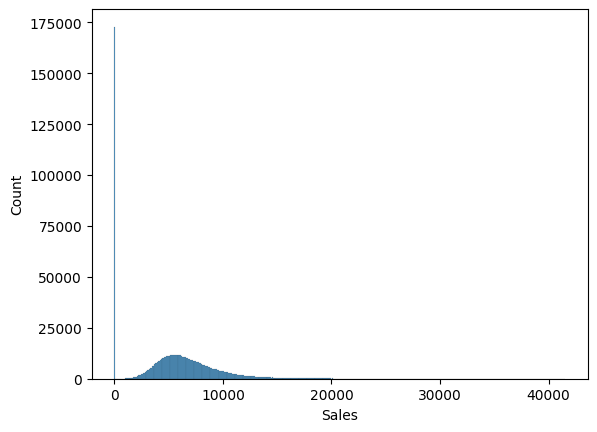

In [11]:
sns.histplot(data = merged_train_df, x = 'Sales')

In [12]:
merged_train_df = merged_train_df[merged_train_df.Open == 1].copy()

<Axes: xlabel='Sales', ylabel='Count'>

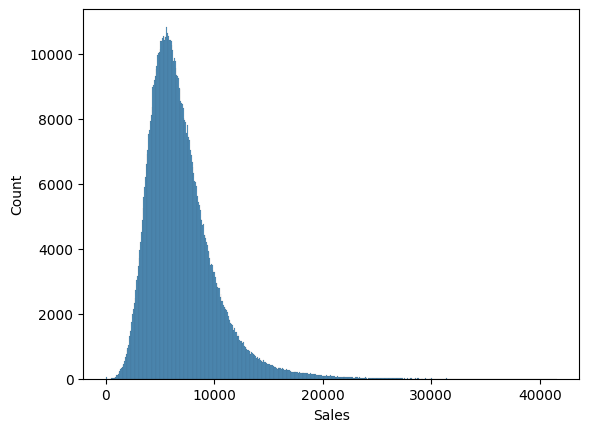

In [13]:
sns.histplot(data = merged_train_df, x = 'Sales')

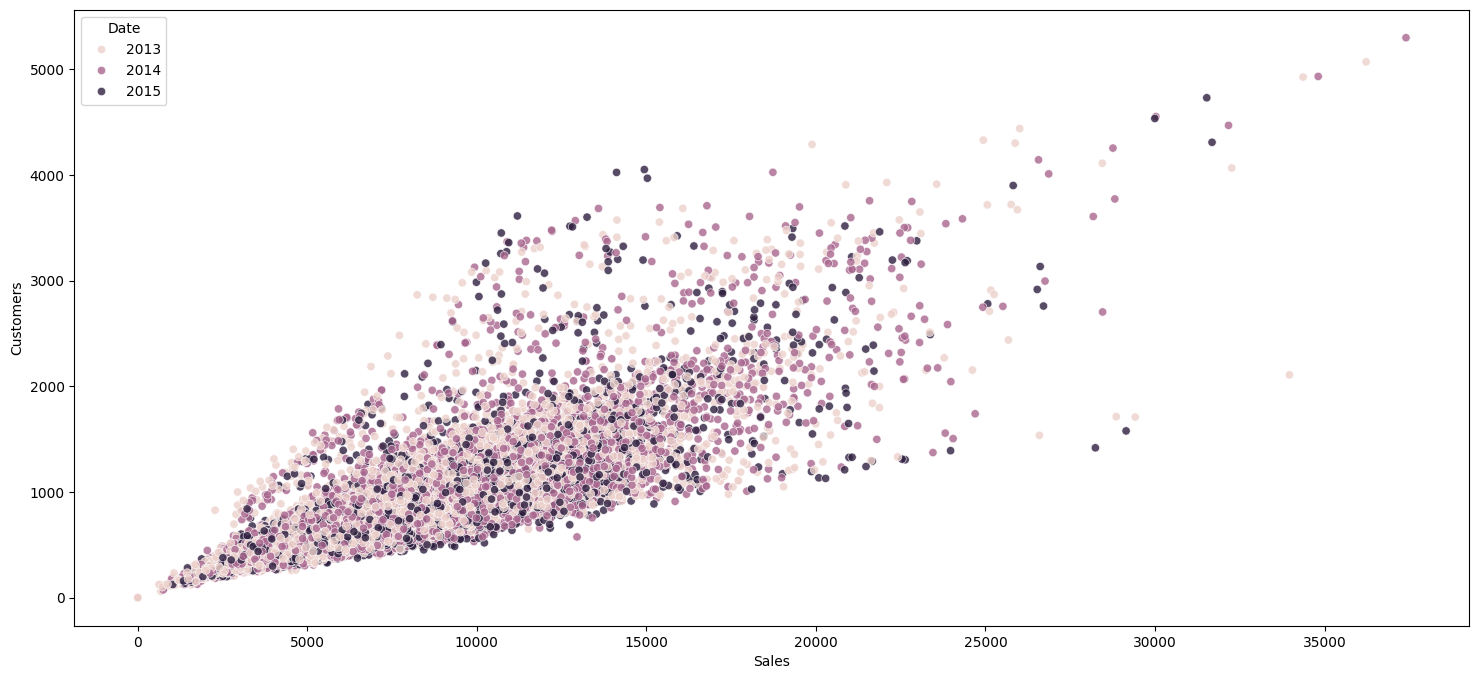

In [14]:
plt.figure(figsize = (18,8))
temp_df = merged_train_df.sample(40000)
sns.scatterplot(x = temp_df.Sales, y = temp_df.Customers, hue = temp_df.Date.dt.year, alpha=0.8)
plt.show()

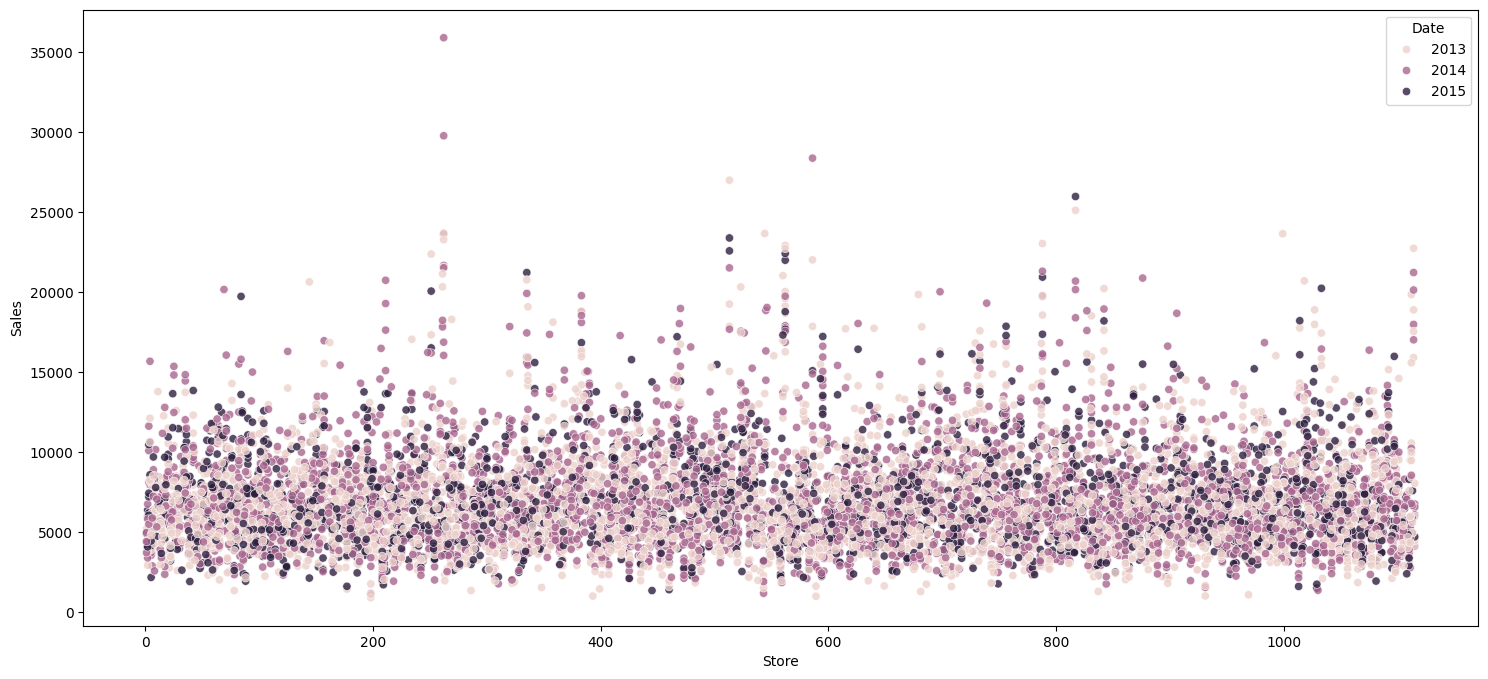

In [15]:
plt.figure(figsize = (18,8))
temp_df = merged_train_df.sample(10000)
sns.scatterplot(x = temp_df.Store, y = temp_df.Sales, hue = temp_df.Date.dt.year, alpha=0.8)
plt.show()

<Axes: xlabel='DayOfWeek', ylabel='Sales'>

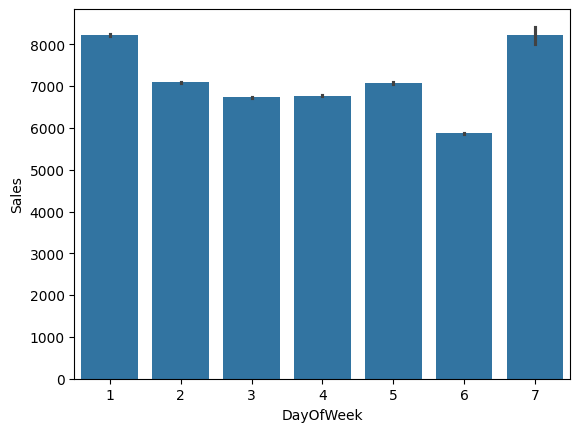

In [16]:
sns.barplot(data = merged_train_df, x = 'DayOfWeek', y = 'Sales')

<Axes: xlabel='Promo', ylabel='Sales'>

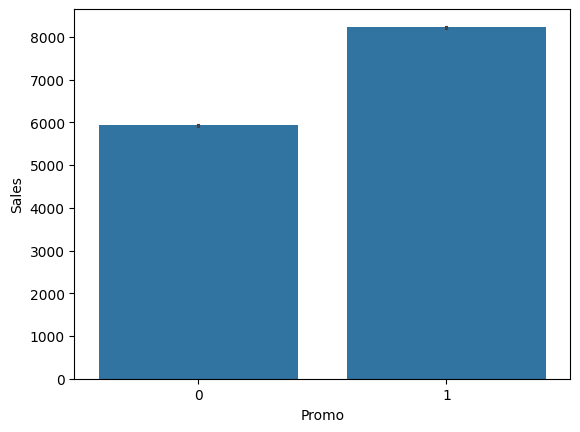

In [17]:
sns.barplot(data = merged_train_df, x = 'Promo', y = 'Sales')

In [18]:
merged_train_df['Year'] = merged_train_df.Date.dt.year
merged_train_df['Month'] = merged_train_df.Date.dt.month
merged_train_df['Day'] = merged_train_df.Date.dt.day

In [19]:
merged_test_df['Year'] = merged_test_df.Date.dt.year
merged_test_df['Month'] = merged_test_df.Date.dt.month
merged_test_df['Day'] = merged_test_df.Date.dt.day

<Axes: xlabel='Year', ylabel='Sales'>

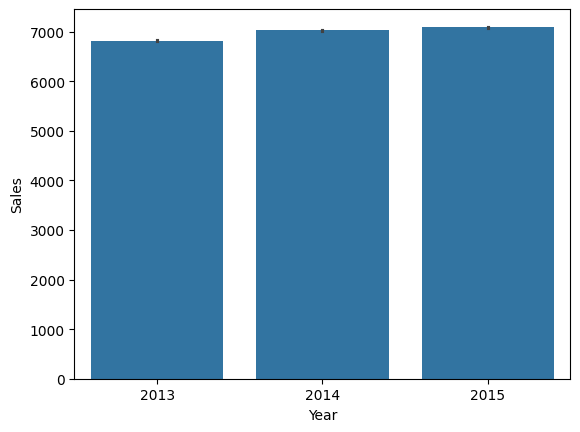

In [20]:
sns.barplot(data = merged_train_df, x = 'Year', y = 'Sales')

<Axes: xlabel='Month', ylabel='Sales'>

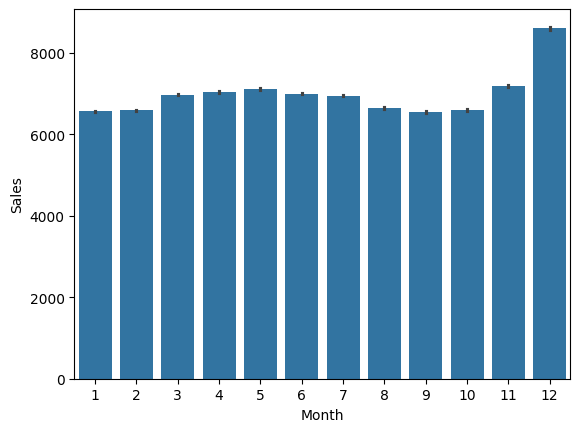

In [21]:
sns.barplot(data = merged_train_df, x = 'Month', y = 'Sales')

In [22]:
merged_train_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day
0,1,5,2015-07-31,5263,555,1,1,0,1,c,...,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2015,7,31
1,2,5,2015-07-31,6064,625,1,1,0,1,a,...,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7,31
2,3,5,2015-07-31,8314,821,1,1,0,1,a,...,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,7,31
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,...,620.0,9.0,2009.0,0,NaN,NaN,NaN,2015,7,31
4,5,5,2015-07-31,4822,559,1,1,0,1,a,...,29910.0,4.0,2015.0,0,NaN,NaN,NaN,2015,7,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016776,682,2,2013-01-01,3375,566,1,0,a,1,b,...,150.0,9.0,2006.0,0,NaN,NaN,NaN,2013,1,1
1016827,733,2,2013-01-01,10765,2377,1,0,a,1,b,...,860.0,10.0,1999.0,0,NaN,NaN,NaN,2013,1,1
1016863,769,2,2013-01-01,5035,1248,1,0,a,1,b,...,840.0,NaN,NaN,1,48.0,2012.0,"Jan,Apr,Jul,Oct",2013,1,1
1017042,948,2,2013-01-01,4491,1039,1,0,a,1,b,...,1430.0,NaN,NaN,0,NaN,NaN,NaN,2013,1,1


<h2><b>Data Preparation</b></h2>

In [23]:
len(merged_train_df)

844392

In [24]:
train_rows = int(.75 * len(merged_train_df))
train_rows

633294

In [25]:
train_df, val_df = merged_train_df[:train_rows], merged_train_df[train_rows:]
len(train_df), len(val_df)

(633294, 211098)

In [26]:
train_df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval', 'Year', 'Month', 'Day'],
      dtype='object')

In [27]:
input_cols = ['Store', 'DayOfWeek', 'Promo', 'StateHoliday', 'StoreType', 'Assortment', 'Day', 'Month', 'Year']
target_cols = 'Sales'

In [28]:
train_input_df = train_df[input_cols].copy()
train_target_df = train_df[target_cols].copy()
val_input_df = val_df[input_cols].copy()
val_target_df = val_df[target_cols].copy()

In [29]:
test_input_df = merged_test_df[input_cols].copy()

In [30]:
numeric_cols = ['Store', 'Day', 'Month', 'Year']
categorical_cols = ['DayOfWeek', 'Promo', 'StateHoliday', 'StoreType', 'Assortment']

In [31]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = 'mean').fit(train_input_df[numeric_cols])

In [32]:
train_input_df[numeric_cols] = imputer.transform(train_input_df[numeric_cols])
val_input_df[numeric_cols] = imputer.transform(val_input_df[numeric_cols])
test_input_df[numeric_cols] = imputer.transform(test_input_df[numeric_cols])

In [33]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler().fit(train_input_df[numeric_cols])

In [34]:
train_input_df[numeric_cols] = scaler.transform(train_input_df[numeric_cols])
val_input_df[numeric_cols] = scaler.transform(val_input_df[numeric_cols])
test_input_df[numeric_cols] = scaler.transform(test_input_df[numeric_cols])

In [35]:
val_input_df

,Store,DayOfWeek,Promo,StateHoliday,StoreType,Assortment,Day,Month,Year
763022,0.028725,5,1,0,a,c,0.5,0.636364,0.0
763023,0.029623,5,1,0,c,a,0.5,0.636364,0.0
763024,0.030521,5,1,0,d,c,0.5,0.636364,0.0
763025,0.031418,5,1,0,a,c,0.5,0.636364,0.0
763026,0.032316,5,1,0,c,a,0.5,0.636364,0.0
...,...,...,...,...,...,...,...,...,...
1016776,0.611311,2,0,a,b,a,0.0,0.000000,0.0
1016827,0.657092,2,0,a,b,b,0.0,0.000000,0.0
1016863,0.689408,2,0,a,b,b,0.0,0.000000,0.0
1017042,0.850090,2,0,a,b,b,0.0,0.000000,0.0


In [36]:
train_input_df['StateHoliday'].unique()

array(['0', 'a', 'b', 'c', 0], dtype=object)

In [37]:
train_input_df[categorical_cols] = train_input_df[categorical_cols].astype(str)
val_input_df[categorical_cols] = val_input_df[categorical_cols].astype(str)
test_input_df[categorical_cols] = test_input_df[categorical_cols].astype(str)

In [38]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore').fit(train_input_df[categorical_cols])

In [39]:
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))
encoded_cols

['DayOfWeek_1',
 'DayOfWeek_2',
 'DayOfWeek_3',
 'DayOfWeek_4',
 'DayOfWeek_5',
 'DayOfWeek_6',
 'DayOfWeek_7',
 'Promo_0',
 'Promo_1',
 'StateHoliday_0',
 'StateHoliday_a',
 'StateHoliday_b',
 'StateHoliday_c',
 'StoreType_a',
 'StoreType_b',
 'StoreType_c',
 'StoreType_d',
 'Assortment_a',
 'Assortment_b',
 'Assortment_c']

In [40]:
train_input_df[encoded_cols] = encoder.transform(train_input_df[categorical_cols])
val_input_df[encoded_cols] = encoder.transform(val_input_df[categorical_cols])
test_input_df[encoded_cols] = encoder.transform(test_input_df[categorical_cols])

In [41]:
X_train = train_input_df[encoded_cols + numeric_cols]
X_val = val_input_df[encoded_cols + numeric_cols]
X_test = test_input_df[encoded_cols + numeric_cols]

<h2><b>Baseline Models</b></h2>

In [42]:
def get_mean(input):
    return np.full(len(input), merged_train_df.Sales.mean())

In [43]:
get_mean(X_train)

array([6955.51429076, 6955.51429076, 6955.51429076, ..., 6955.51429076,
       6955.51429076, 6955.51429076], shape=(633294,))

In [44]:
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(get_mean(X_train), train_target_df)
np.sqrt(MSE)

np.float64(3133.6629394533265)

In [45]:
MSE = mean_squared_error(get_mean(X_val), val_target_df)
np.sqrt(MSE)

np.float64(3014.1365640407585)

In [46]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [47]:
model.fit(X_train, train_target_df)

LinearRegression()

In [48]:
train_pred = model.predict(X_train)
train_pred

array([8057.80154259, 8135.73741628, 8135.79287799, ..., 7718.78045311,
       8337.75058388, 7718.89137653], shape=(633294,))

In [49]:
np.sqrt(mean_squared_error(train_pred, train_target_df))

np.float64(2772.6581097926924)

In [50]:
val_pred = model.predict(X_val)
val_pred

array([8600.48576021, 7641.12188796, 8337.97243071, ..., 7471.70826703,
       7481.6359127 , 7489.89970714], shape=(211098,))

In [51]:
np.sqrt(mean_squared_error(val_pred, val_target_df))

np.float64(2721.105082762065)

<h2><b>Trying Different Models</b></h2>

In [52]:
def try_models(model):
    model.fit(X_train, train_target_df)
    train_pred = model.predict(X_train)
    val_pred = model.predict(X_val)
    train_rmse = np.sqrt(mean_squared_error(train_pred, train_target_df))
    val_rmse = np.sqrt(mean_squared_error(val_pred, val_target_df))
    return train_rmse, val_rmse

In [53]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, SGDRegressor

In [54]:
try_models(LinearRegression())

(np.float64(2772.6581097926924), np.float64(2721.105082762065))

In [55]:
try_models(Ridge())

(np.float64(2772.658112258839), np.float64(2721.106600417526))

In [56]:
try_models(Lasso())

(np.float64(2772.8141286709224), np.float64(2720.6644961813377))

In [57]:
try_models(ElasticNet())

(np.float64(2921.139404974477), np.float64(2830.9613742398))

In [58]:
try_models(SGDRegressor())

(np.float64(2773.3352053976246), np.float64(2724.0663003108334))

In [59]:
from sklearn.tree import DecisionTreeRegressor, plot_tree

In [60]:
tree = DecisionTreeRegressor(random_state=42)
try_models(tree)

(np.float64(0.0), np.float64(1347.39288056442))

[Text(0.5, 0.9, 'DayOfWeek_5 <= 0.5\nsquared_error = 9813422.027\nsamples = 633294\nvalue = 7035.648'),
 Text(0.25, 0.7, 'StateHoliday_a <= 0.5\nsquared_error = 7072092.349\nsamples = 353290\nvalue = 6003.002'),
 Text(0.375, 0.8, 'True  '),
 Text(0.125, 0.5, 'StoreType_c <= 0.5\nsquared_error = 6397589.97\nsamples = 345852\nvalue = 5922.757'),
 Text(0.0625, 0.3, 'Assortment_b <= 0.955\nsquared_error = 5489013.048\nsamples = 182309\nvalue = 5524.307'),
 Text(0.03125, 0.1, '\n  (...)  \n'),
 Text(0.09375, 0.1, '\n  (...)  \n'),
 Text(0.1875, 0.3, 'Assortment_b <= 0.955\nsquared_error = 7036155.101\nsamples = 163543\nvalue = 6366.928'),
 Text(0.15625, 0.1, '\n  (...)  \n'),
 Text(0.21875, 0.1, '\n  (...)  \n'),
 Text(0.375, 0.5, 'StoreType_c <= 0.5\nsquared_error = 24213682.176\nsamples = 7438\nvalue = 9734.221'),
 Text(0.3125, 0.3, 'StoreType_d <= 0.24\nsquared_error = 21894416.23\nsamples = 6994\nvalue = 9283.623'),
 Text(0.28125, 0.1, '\n  (...)  \n'),
 Text(0.34375, 0.1, '\n  (...)  \

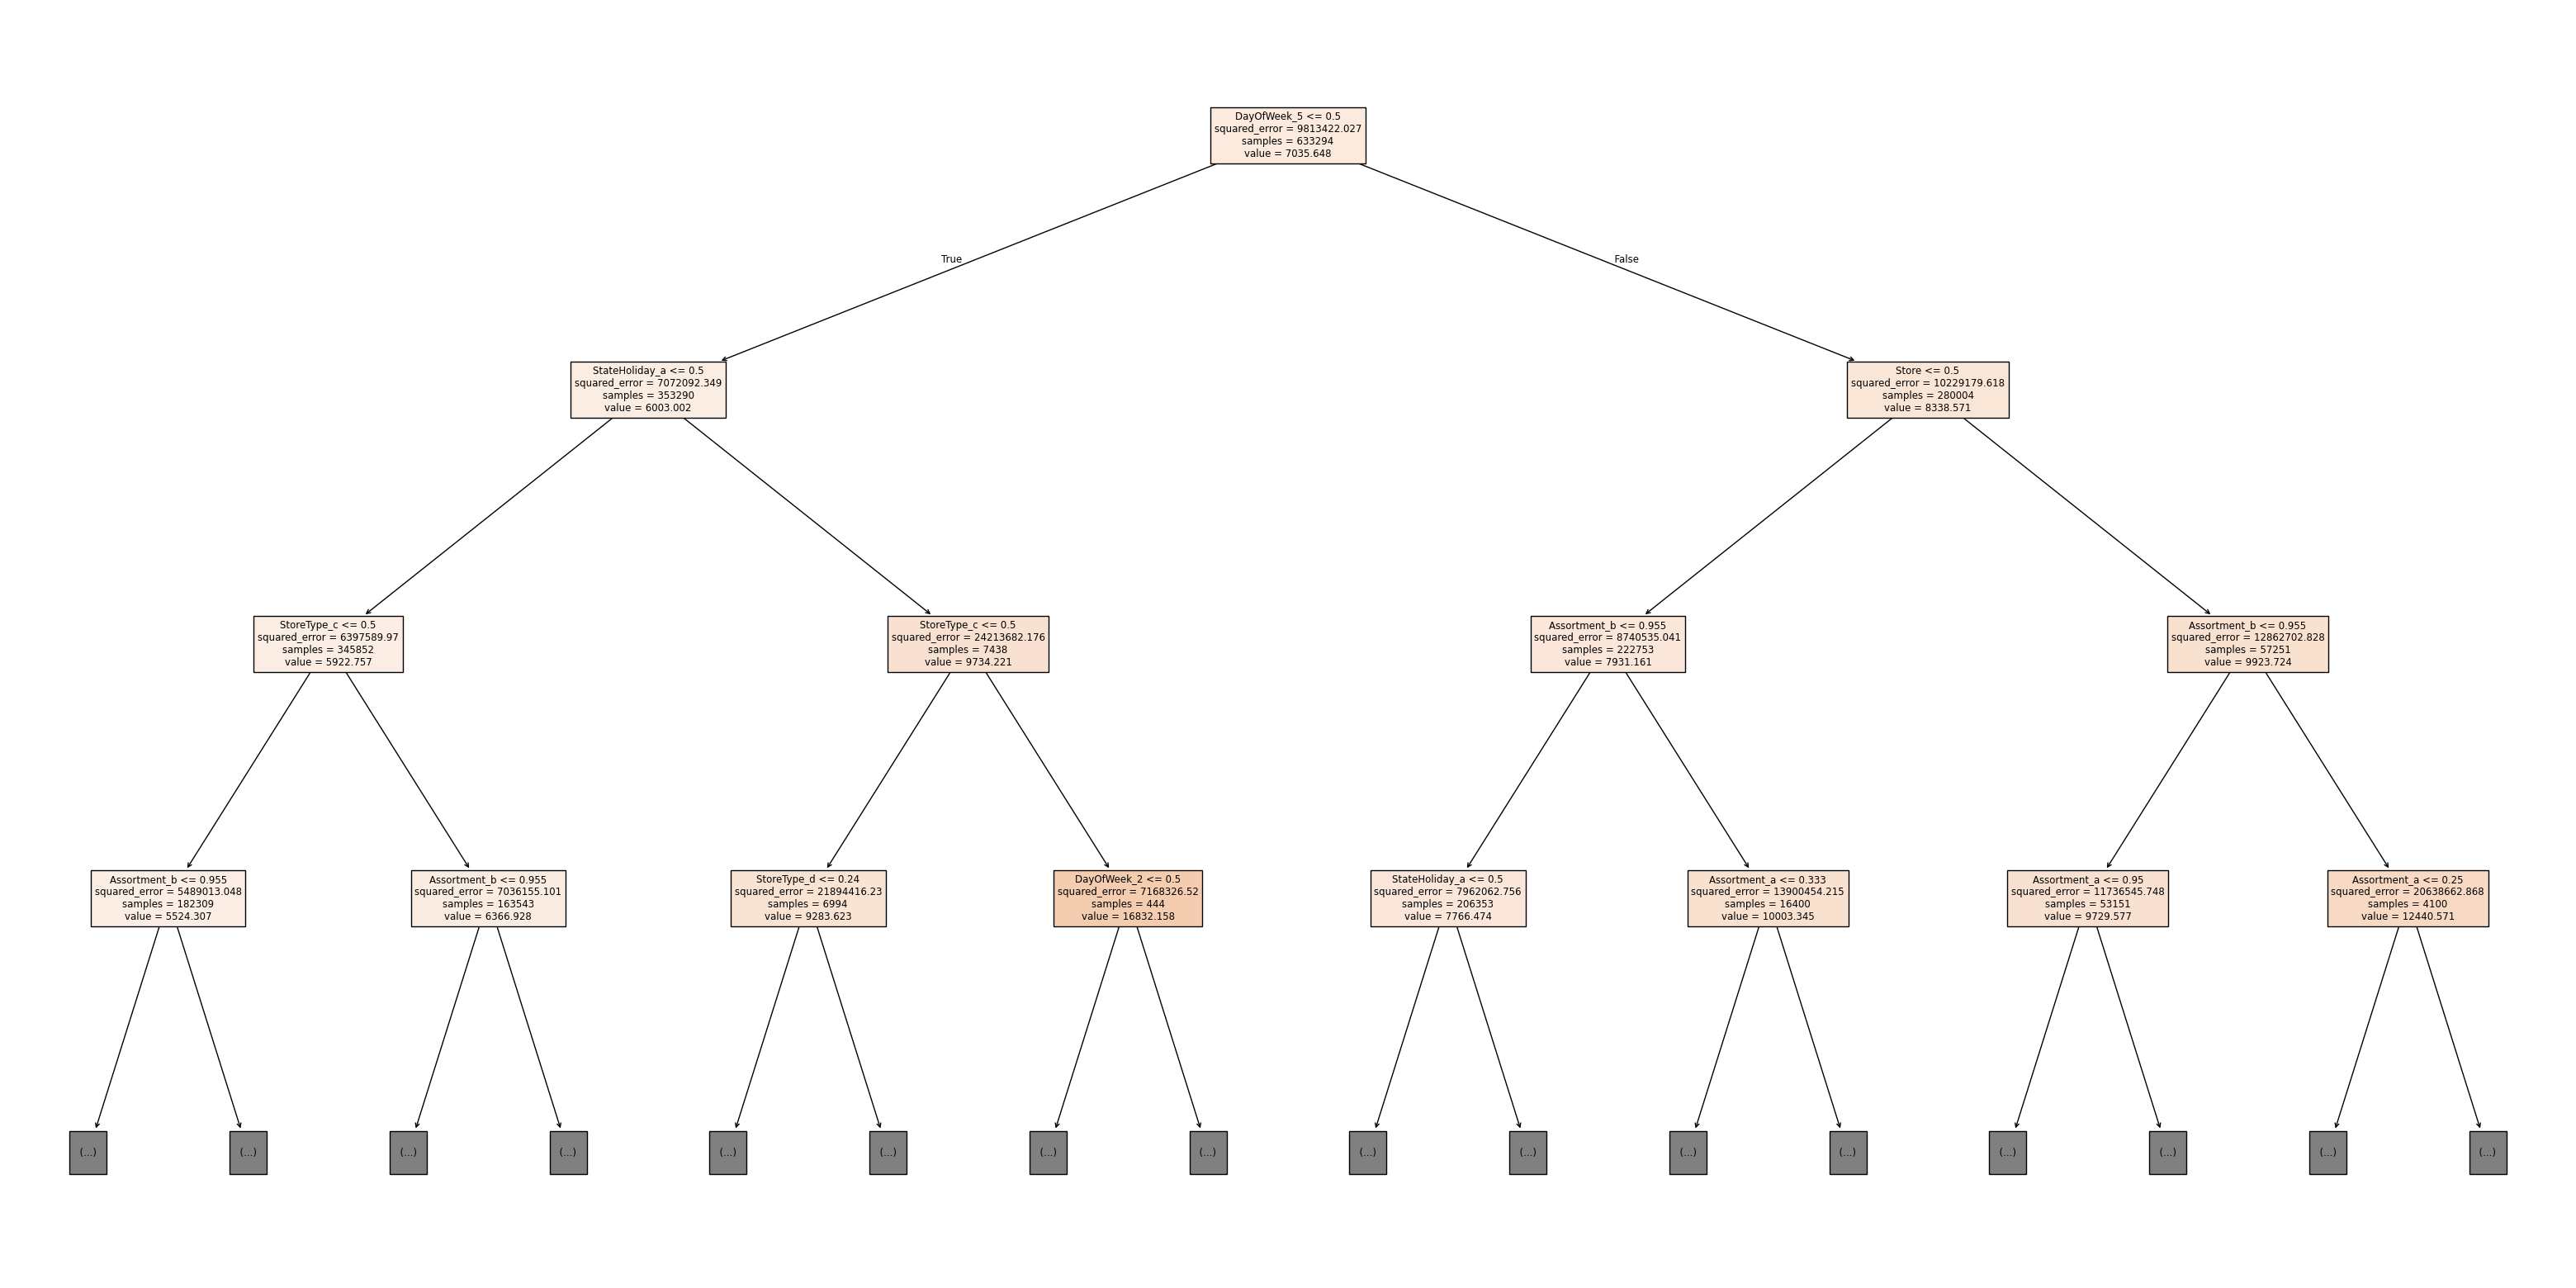

In [61]:
plt.figure(figsize=(40, 20))
plot_tree(tree, max_depth=3, filled=True, feature_names=numeric_cols+encoded_cols)

In [62]:
from sklearn.ensemble import RandomForestRegressor

In [63]:
rf = RandomForestRegressor(random_state=42, n_jobs=-1)
try_models(rf)

(np.float64(476.8897860170517), np.float64(1128.0226523243884))

In [64]:
rf.feature_importances_

array([3.51282916e-02, 4.56528360e-03, 2.51092732e-03, 2.17433801e-03,
       5.26583964e-03, 6.62149758e-03, 4.92913362e-03, 6.58903281e-02,
       7.13011666e-02, 1.34790245e-03, 2.21475500e-04, 4.20594005e-05,
       2.87402532e-05, 1.54823099e-02, 2.59619212e-02, 1.04906501e-02,
       1.33293420e-02, 9.41682866e-03, 2.04482054e-03, 1.50033961e-02,
       5.90655046e-01, 5.47849881e-02, 5.15331481e-02, 1.12705655e-02])

In [65]:
importance_df = pd.DataFrame({ 
    'feature': numeric_cols+encoded_cols, 
    'importance': rf.feature_importances_
}).sort_values('importance', ascending=False)
importance_df.head(10)

,feature,importance
20,StoreType_d,0.590655
8,DayOfWeek_5,0.071301
7,DayOfWeek_4,0.065890
21,Assortment_a,0.054785
22,Assortment_b,0.051533
0,Store,0.035128
14,StateHoliday_a,0.025962
13,StateHoliday_0,0.015482
19,StoreType_c,0.015003
16,StateHoliday_c,0.013329


<Axes: xlabel='importance', ylabel='feature'>

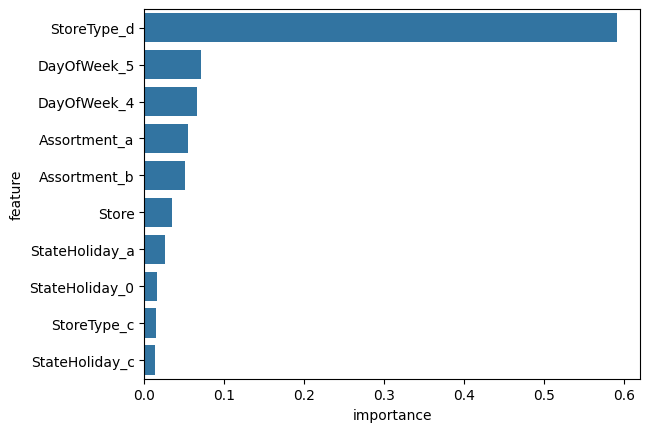

In [66]:
sns.barplot(data=importance_df.head(10), x='importance', y='feature')